In [1]:
import json
import os
from os import listdir
import matplotlib.pyplot as plt
import datetime, time
import pytz
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

C:\Users\kellybielaski\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Part 1.1

In [13]:
#csv_files = os.listdir("tweet_data_csv_a\\")
csv_files = os.listdir("D:/Git/Data_for_project5/Part1B_data/")
print(csv_files)
df_hashtag_all = {}
for csv_file in csv_files:
    #if("checkpoint" in csv_file):
    #    continue
    print("Doing OLS for " + csv_file[10:-4])
    #df = pd.read_csv("tweet_data_csv_a\\" + csv_file)
    df = pd.read_csv("D:/Git/Data_for_project5/Part1B_data/" + csv_file)
    print("Reading CSV done")
    df["time_of_tweet"] = [i[:-6] for i in df["time_of_tweet"]]
    df['time_of_tweet'] = pd.to_datetime(df['time_of_tweet'])
    
    print("     avg followers " + str(np.mean(df['sum_followers'])))
    print("     avg retweets " + str(np.mean(df['num_retweets'])))
    
    hourly_df = df.groupby(pd.TimeGrouper(key = 'time_of_tweet',freq = '60Min')).sum()
    print("     avg tweet per hour " + str(np.mean(hourly_df['num_of_tweets'])))
    df_hashtag_all[csv_file] = hourly_df

['.ipynb_checkpoints', 'df_tweets_#gohawks.csv', 'df_tweets_#gopatriots.csv', 'df_tweets_#nfl.csv', 'df_tweets_#patriots.csv', 'df_tweets_#sb49.csv', 'df_tweets_#superbowl.csv']
Doing OLS for #gohawks
Reading CSV done
     avg followers 2203.931767444827
     avg retweets 2.014617085512608
     avg tweet per hour 328.90909090909093
Doing OLS for #gopatriots
Reading CSV done
     avg followers 1401.8955093016164
     avg retweets 1.4000838670326319
     avg tweet per hour 58.68456375838926
Doing OLS for #nfl
Reading CSV done
     avg followers 4653.252285502502
     avg retweets 1.5385331089011056
     avg tweet per hour 444.295025728988
Doing OLS for #patriots
Reading CSV done
     avg followers 3309.978828415827
     avg retweets 1.7828156491659402
     avg tweet per hour 834.2640545144804
Doing OLS for #sb49
Reading CSV done
     avg followers 10267.31684948685
     avg retweets 2.5111487863247035
     avg tweet per hour 1528.5600739371534
Doing OLS for #superbowl
Reading CSV done
  

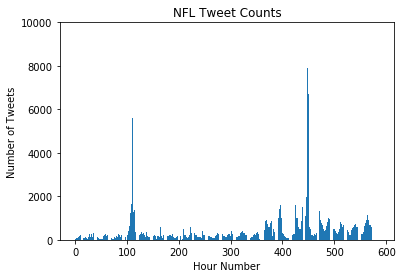

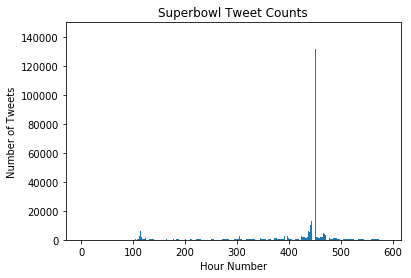

In [17]:
for csv_filename in df_hashtag_all.keys():
    if("superbowl" in csv_filename or "nfl" in csv_filename):
        df_hashtag = df_hashtag_all[csv_filename]
        num_tweets = df_hashtag['num_of_tweets'].values.tolist()
        plt.bar(np.arange(len(num_tweets)), num_tweets)
        plt.xlabel('Hour Number')
        plt.ylabel("Number of Tweets")
        if("superbowl" in csv_filename):
            axes = plt.gca()
            axes.set_ylim([0, 150000])
            keyword = "Superbowl"
        else:
            axes = plt.gca()
            axes.set_ylim([0, 10000])
            keyword = "NFL"
        plt.title(keyword + " Tweet Counts")
        plt.show()

# Part 1.2

In [3]:
#csv_files = os.listdir("tweet_data_csv_a\\")
csv_files = os.listdir("D:/Git/Data_for_project5/Part1B_data/")
print(csv_files)
for csv_file in csv_files:
    #if("checkpoint" in csv_file):
    #    continue
    print("Doing OLS for " + csv_file[10:-4])
    #df = pd.read_csv("tweet_data_csv_a\\" + csv_file)
    df = pd.read_csv("D:/Git/Data_for_project5/Part1B_data/" + csv_file)
    print("Reading CSV done")
    df["time_of_tweet"] = [i[:-6] for i in df["time_of_tweet"]]
    df['time_of_tweet'] = pd.to_datetime(df['time_of_tweet'])
    hourly_df = df.groupby(pd.TimeGrouper(key = 'time_of_tweet',freq = '60Min'))
    print(hourly_df.head())
    X_train = np.zeros((len(hourly_df),5))
    Y_train = np.zeros((len(hourly_df)))
    for i,(hour,grp) in enumerate(hourly_df):
        if i == 25:
            print(hour.hour)
            print(grp.head())
        X_train[i,0] = grp.num_of_tweets.sum()
        X_train[i,1] = grp.num_retweets.sum()
        X_train[i,2] = grp.sum_followers.sum()
        X_train[i,3] = grp.max_followers.max()
        X_train[i,4] = hour.hour

        Y_train[i] = grp.num_of_tweets.sum()
    Y_train = Y_train[1:]
    X_train = X_train[:-1]
    X_train = np.nan_to_num(X_train)
    
    result = sm.OLS(Y_train, X_train).fit()
    preds = result.predict(X_train)
    print("*******************************************************")
    print("RMSE = " + str(sqrt(mean_squared_error(Y_train,preds))))
    print(result.tvalues)
    print(result.pvalues)
    print("*******************************************************")
    print(result.summary())
    

    
    
    

['.ipynb_checkpoints', 'df_tweets_#gohawks.csv', 'df_tweets_#gopatriots.csv', 'df_tweets_#nfl.csv', 'df_tweets_#patriots.csv', 'df_tweets_#sb49.csv', 'df_tweets_#superbowl.csv']
Doing OLS for #gohawks
Reading CSV done
        Unnamed: 0       time_of_tweet  num_of_tweets  num_retweets  \
229            229 2015-01-14 00:04:41            1.0           1.0   
230            230 2015-01-14 00:04:59            1.0           2.0   
227            227 2015-01-14 00:05:50            1.0           3.0   
231            231 2015-01-14 00:09:21            1.0           1.0   
232            232 2015-01-14 00:12:20            1.0           1.0   
250            250 2015-01-14 01:01:33            1.0           1.0   
251            251 2015-01-14 01:08:01            1.0           1.0   
252            252 2015-01-14 01:12:00            1.0           1.0   
37              37 2015-01-14 01:21:33            1.0          14.0   
253            253 2015-01-14 01:21:48            1.0           1.0   
2

*******************************************************
RMSE = 185.10178378457965
[-0.31636098  2.30349237  1.21300078 -1.88106758  0.92073068]
[ 0.75184455  0.02161076  0.22563286  0.0604731   0.35758124]
*******************************************************
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     202.0
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          1.42e-123
Time:                        08:12:34   Log-Likelihood:                -3811.3
No. Observations:                 574   AIC:                             7633.
Df Residuals:                     569   BIC:                             7654.
Df Model:                           5                                         
Covariance Type:           

*******************************************************
RMSE = 585.1367333178064
[ 5.55885988 -2.78863538  2.99811022 -2.01651422  3.4165333 ]
[  4.14282814e-08   5.46648602e-03   2.83275095e-03   4.42058427e-02
   6.78562679e-04]
*******************************************************
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          5.64e-129
Time:                        08:12:35   Log-Likelihood:                -4565.4
No. Observations:                 586   AIC:                             9141.
Df Residuals:                     581   BIC:                             9163.
Df Model:                           5                                         
Co

*******************************************************
RMSE = 2527.9129919112593
[ 12.87819087  -1.47617439  -0.04517145   1.76965669   0.44944693]
[  1.45577505e-33   1.40438838e-01   9.63986171e-01   7.73088162e-02
   6.53276897e-01]
*******************************************************
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     247.8
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          1.83e-141
Time:                        08:12:36   Log-Likelihood:                -5422.9
No. Observations:                 586   AIC:                         1.086e+04
Df Residuals:                     581   BIC:                         1.088e+04
Df Model:                           5                                      

*******************************************************
RMSE = 4471.963706873071
[ 12.49606919  -2.45308514   1.333156     2.11738198  -0.2463851 ]
[  6.99920049e-32   1.44584812e-02   1.83006727e-01   3.46546122e-02
   8.05471767e-01]
*******************************************************
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     487.3
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          2.12e-204
Time:                        08:12:39   Log-Likelihood:                -5717.9
No. Observations:                 582   AIC:                         1.145e+04
Df Residuals:                     577   BIC:                         1.147e+04
Df Model:                           5                                       

*******************************************************
RMSE = 8004.575334063535
[ 28.9616953   -8.05914806  -7.01965064   5.45677703  -1.30802908]
[  8.06131086e-115   4.38995558e-015   6.22750477e-012   7.18710969e-008
   1.91380719e-001]
*******************************************************
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     480.7
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          9.56e-204
Time:                        08:12:42   Log-Likelihood:                -6098.3
No. Observations:                 586   AIC:                         1.221e+04
Df Residuals:                     581   BIC:                         1.223e+04
Df Model:                           5                                  

# Part 1.3

['df_part1c_tweets_#gohawks.csv', 'df_part1c_tweets_#gopatriots.csv', 'df_part1c_tweets_#nfl.csv', 'df_part1c_tweets_#patriots.csv', 'df_part1c_tweets_#sb49.csv', 'df_part1c_tweets_#superbowl.csv']
Doing OLS for tweets_#gohawks
Reading CSV done
RMSE = 792.0449492104833
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     95.67
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          1.44e-127
Time:                        16:03:15   Log-Likelihood:                -4678.1
No. Observations:                 578   AIC:                             9380.
Df Residuals:                     566   BIC:                             9432.
Df Model:                          12                                         
Covariance Type:   

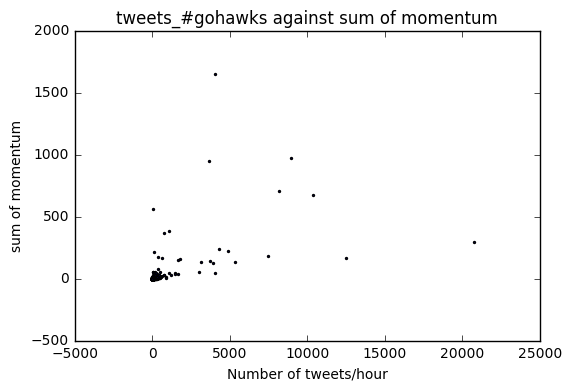

Sum of followers


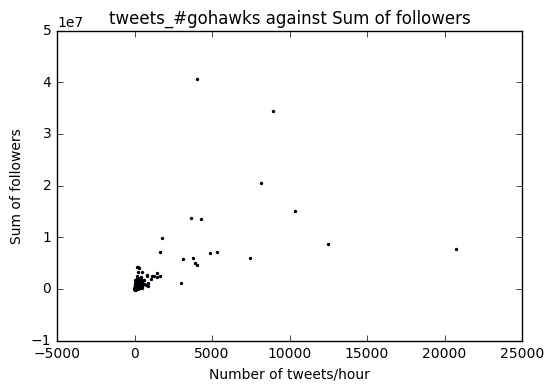

sum of status


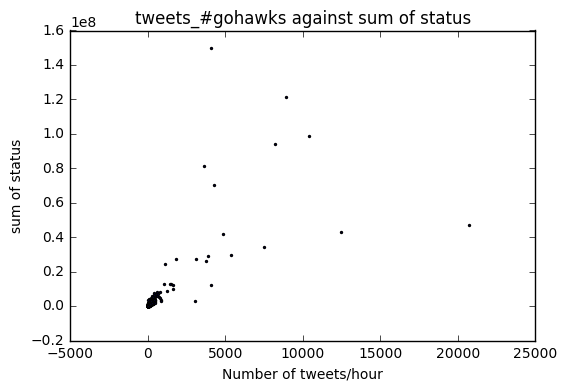

Doing OLS for tweets_#gopatriots
Reading CSV done
RMSE = 158.48601891541676
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          1.17e-153
Time:                        16:03:16   Log-Likelihood:                -3722.2
No. Observations:                 574   AIC:                             7468.
Df Residuals:                     562   BIC:                             7521.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

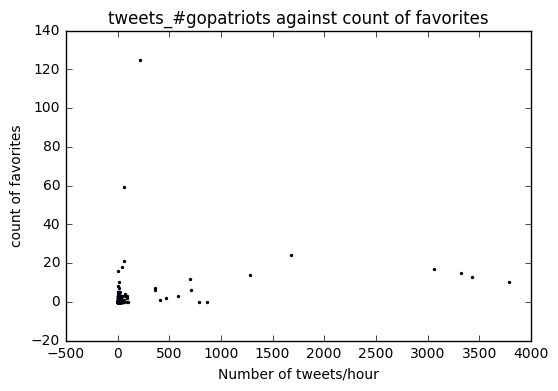

sum of status


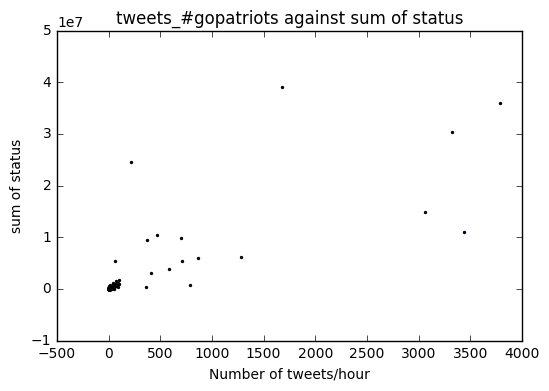

num_of_retweets


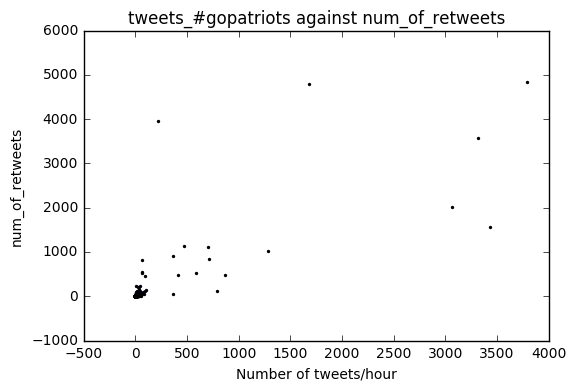

Doing OLS for tweets_#nfl
Reading CSV done
RMSE = 482.1178277028538
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     152.0
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          2.57e-169
Time:                        16:03:19   Log-Likelihood:                -4451.9
No. Observations:                 586   AIC:                             8928.
Df Residuals:                     574   BIC:                             8980.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

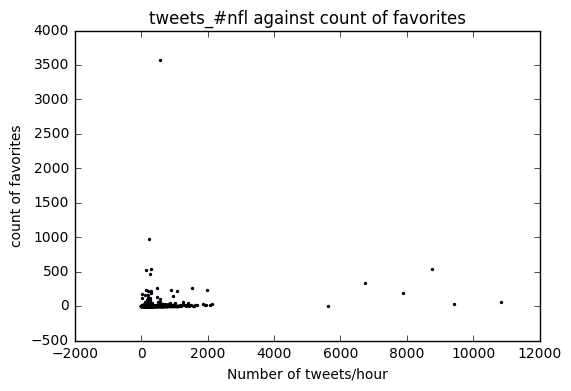

num_of_tweets


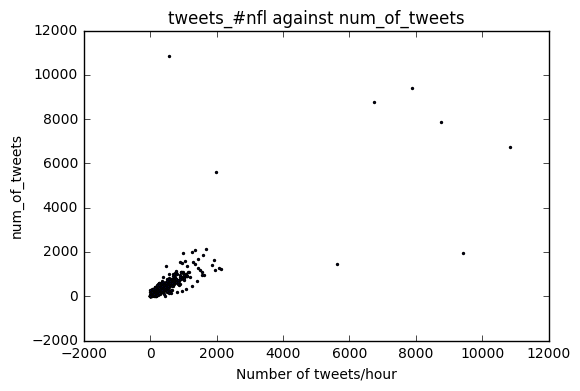

sum of ranking scores


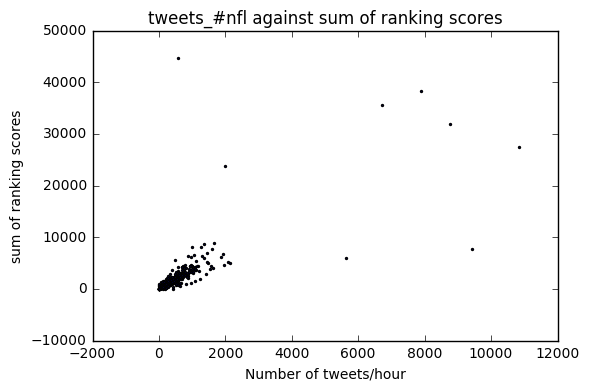

Doing OLS for tweets_#patriots
Reading CSV done
RMSE = 2230.457675306663
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     144.6
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          1.21e-164
Time:                        16:03:22   Log-Likelihood:                -5349.5
No. Observations:                 586   AIC:                         1.072e+04
Df Residuals:                     574   BIC:                         1.078e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

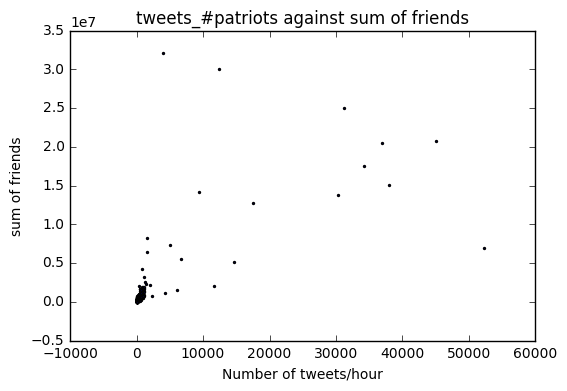

sum of status


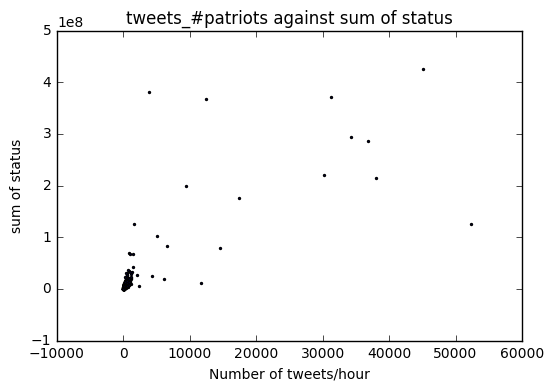

num_of_tweets


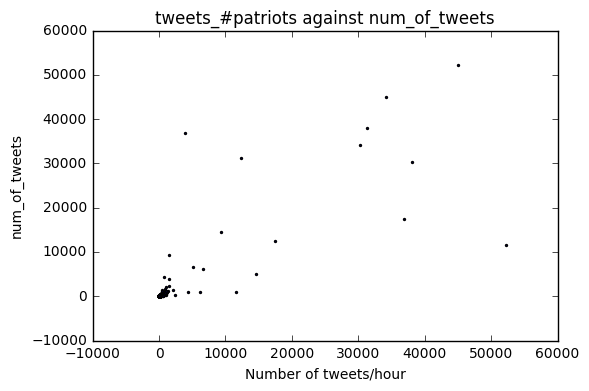

Doing OLS for tweets_#sb49
Reading CSV done
RMSE = 4344.454965441463
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     215.3
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          1.08e-202
Time:                        16:03:26   Log-Likelihood:                -5701.0
No. Observations:                 582   AIC:                         1.143e+04
Df Residuals:                     570   BIC:                         1.148e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

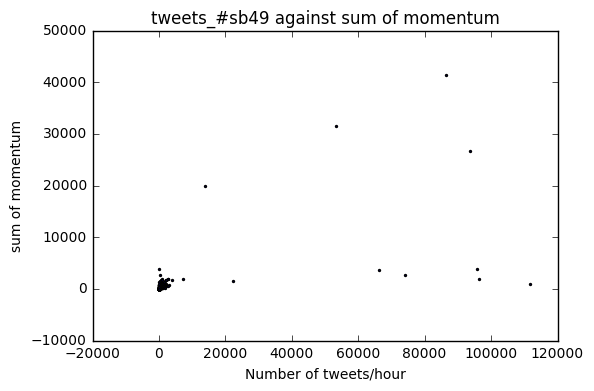

 max of followers


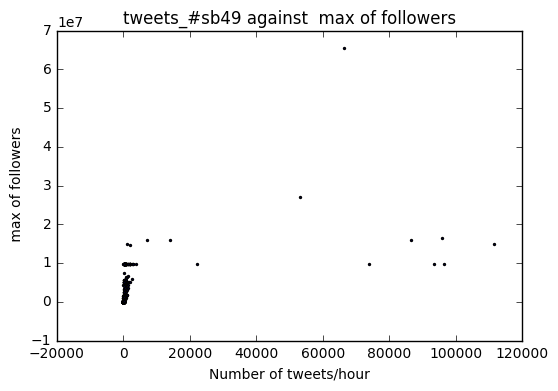

count of favorites


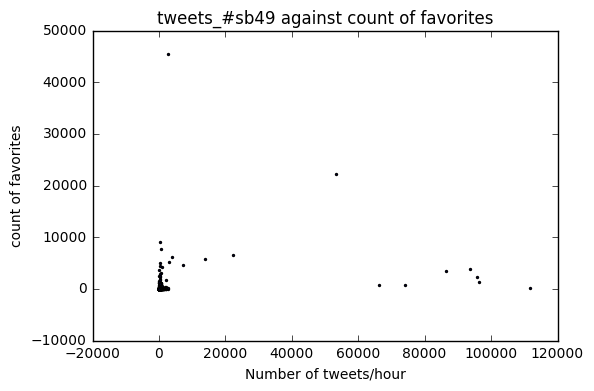

Doing OLS for tweets_#superbowl
Reading CSV done
RMSE = 6058.779193236606
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     381.0
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          3.84e-264
Time:                        16:03:30   Log-Likelihood:                -5935.1
No. Observations:                 586   AIC:                         1.189e+04
Df Residuals:                     574   BIC:                         1.195e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

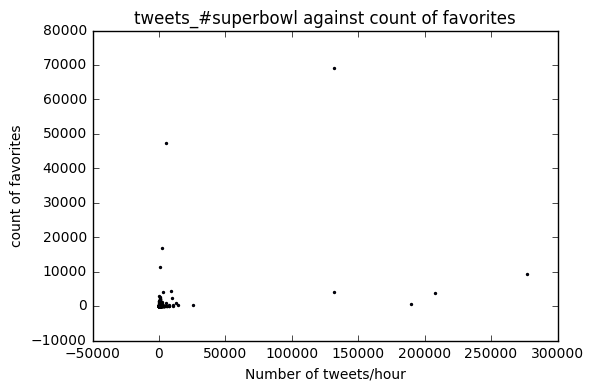

sum of momentum


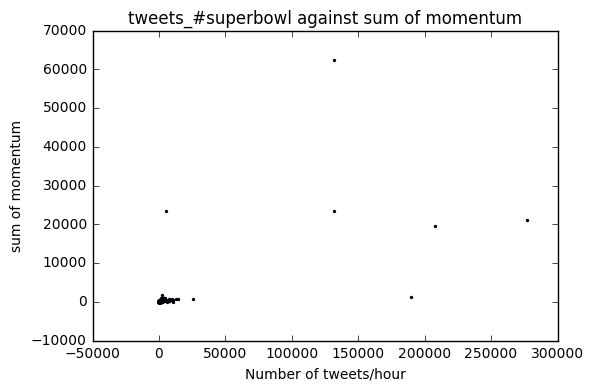

num_of_retweets


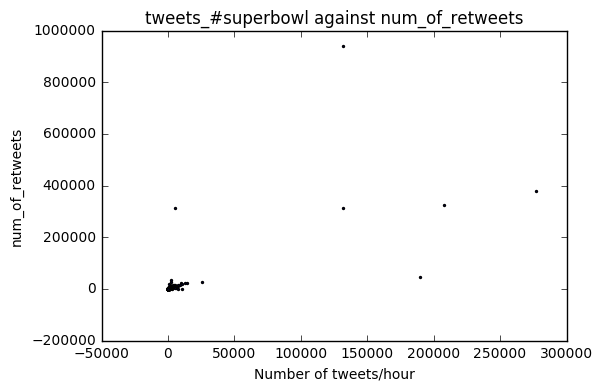

In [46]:
csv_files = os.listdir("D:/Git/Data_for_project5/Part1C_data/")
print(csv_files)
features = ["num_of_tweets","num_of_retweets","Sum of followers"," max of followers","hour","count of favorites","sum of verified","sum of status","sum of friends","sum of ranking scores","sum of impressions","sum of momentum"]
for csv_file in csv_files:
    print("Doing OLS for " + csv_file[10:-4])
    df = pd.read_csv("D:/Git/Data_for_project5/Part1C_data/" + csv_file)
    print("Reading CSV done")
    df["time_of_tweet"] = [i[:-6] for i in df["time_of_tweet"]]
    df['time_of_tweet'] = pd.to_datetime(df['time_of_tweet'])
    hourly_df = df.groupby(pd.TimeGrouper(key = 'time_of_tweet',freq = '60Min'))
    X_train = np.zeros((len(hourly_df),12))
    Y_train = np.zeros((len(hourly_df)))
    for i,(hour,grp) in enumerate(hourly_df):
        X_train[i,0] = grp.num_of_tweets.sum()
        X_train[i,1] = grp.num_retweets.sum()
        X_train[i,2] = grp.sum_followers.sum()
        X_train[i,3] = grp.max_followers.max()
        X_train[i,4] = hour.hour
        X_train[i,5] = grp.sum_fav_count.sum()
        X_train[i,6] = grp.sum_verified.sum()
        X_train[i,7] = grp.sum_status.sum()
        X_train[i,8] = grp.sum_friends.sum()
        X_train[i,9] = grp.sum_ranking_score.sum()
        X_train[i,10] = grp.sum_impressions.sum()
        X_train[i,11] = grp.sum_momentum.sum()

        Y_train[i] = grp.num_of_tweets.sum()
    Y_train = Y_train[1:]
    X_train = X_train[:-1]
    X_train = np.nan_to_num(X_train)
    #print(X_train[:5])
    #print(X_train.shape)
    res = sm.OLS(Y_train, X_train).fit()
    preds = res.predict(X_train)
    print("RMSE = " + str(sqrt(mean_squared_error(Y_train,preds))))
    print(res.summary())
    print(res.pvalues)
    features_best_3 = res.pvalues.argsort()[:3]
    print("Best Features are:")
    for ind in features_best_3:
        print(features[ind])
        plt.title("{0} against {1}".format(csv_file[10:-4], features[ind]))
        plt.xlabel("Number of tweets/hour")
        plt.ylabel(features[ind])
        plt.scatter(Y_train, X_train[:, ind], s = 2)
        plt.show()
        

# Part 1.4

In [12]:
def make_train(df):
    hourly_df = df.groupby(pd.TimeGrouper(key = 'time_of_tweet',freq = '60Min'))
    X_train = np.zeros((len(hourly_df),12))
    Y_train = np.zeros((len(hourly_df)))
    for i,(hour,grp) in enumerate(hourly_df):
        X_train[i,0] = grp.num_of_tweets.sum()
        X_train[i,1] = grp.num_retweets.sum()
        X_train[i,2] = grp.sum_followers.sum()
        X_train[i,3] = grp.max_followers.max()
        X_train[i,4] = hour.hour
        X_train[i,5] = grp.sum_fav_count.sum()
        X_train[i,6] = grp.sum_verified.sum()
        X_train[i,7] = grp.sum_status.sum()
        X_train[i,8] = grp.sum_friends.sum()
        X_train[i,9] = grp.sum_ranking_score.sum()
        X_train[i,10] = grp.sum_impressions.sum()
        X_train[i,11] = grp.sum_momentum.sum()

        Y_train[i] = grp.num_of_tweets.sum()
    Y_train = Y_train[1:]
    X_train = X_train[:-1]
    X_train = np.nan_to_num(X_train)
    return X_train,Y_train
    

In [39]:
def cv(X,Y,mod):
    mae = []
    if mod == "Linear":
        for train_index,test_index in KFold(n_splits = 10).split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            model = sm.OLS(Y_train,X_train).fit()
            preds = model.predict(X_test)
            mae.append(mean_absolute_error(Y_test,preds))
    elif mod == "Poly_2":
        poly = PolynomialFeatures(2)
        X = poly.fit_transform(X)
        #X_tes = poly.transform(X_test)
        for train_index,test_index in KFold(n_splits = 10).split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            
            model = sm.OLS(Y_train,X_train).fit()
            preds = model.predict(X_test)
            mae.append(mean_absolute_error(Y_test,preds))
    elif mod == "Poly_3":
        poly = PolynomialFeatures(3)
        X = poly.fit_transform(X)
        #    X_test = poly.transform(X_test)
        for train_index,test_index in KFold(n_splits = 10).split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            model = sm.OLS(Y_train,X_train).fit()
            preds = model.predict(X_test)
            mae.append(mean_absolute_error(Y_test,preds))
    elif mod == "Decision Tree":
        for train_index,test_index in KFold(n_splits = 10).split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            model = DecisionTreeRegressor(max_depth=5)
            model.fit(X_train,Y_train)
            preds = model.predict(X_test)
            mae.append(mean_absolute_error(Y_test,preds))
    elif mod == "Random Forest":
        for train_index,test_index in KFold(n_splits = 10).split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            model = RandomForestRegressor()
            model.fit(X_train,Y_train)
            preds = model.predict(X_test)
            mae.append(mean_absolute_error(Y_test,preds))
    elif mod == "Knn":
        for train_index,test_index in KFold(n_splits = 10).split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            model = KNeighborsRegressor()
            model.fit(X_train,Y_train)
            preds = model.predict(X_test)
            mae.append(mean_absolute_error(Y_test,preds))
    
        
        
        
    return mae
        

In [40]:
csv_files = os.listdir("D:/Git/Data_for_project5/Part1C_data/")
print(csv_files)
features = ["num_of_tweets","num_of_retweets","Sum of followers"," max of followers","hour","count of favorites","sum of verified","sum of status","sum of friends","sum of ranking scores","sum of impressions","sum of momentum"]
cache = {}
for csv_file in csv_files:
    print("Doing OLS for " + csv_file[10:-4])
    print("**************************************************************")
    df = pd.read_csv("D:/Git/Data_for_project5/Part1C_data/" + csv_file)
    print("Reading CSV done")
    df["time_of_tweet"] = [i[:-6] for i in df["time_of_tweet"]]
    df['time_of_tweet'] = pd.to_datetime(df['time_of_tweet'])
    
    models = ["Linear", "Poly_2", "Poly_3", "Decision Tree", "Random Forest", "Knn"]
    for model in models:
        print("For Model : " + model)
        print('Metrics for Full set')

        X,Y = make_train(df)
        train_mae = cv(X,Y,model)

        print('MAE = ' + str(np.mean(train_mae)))

        print('Metrics for 1st Interval')

        df1 = df[df.time_of_tweet < datetime.datetime(2015,2,1,8,0,0)]


        X,Y = make_train(df1)
        train_mae = cv(X,Y,model)
        cache[str((model,'interval1',csv_file[10:-4]))] = train_mae

        print('MAE = ' + str(np.mean(train_mae)))

        #print('Metrics for 1st Interval')

        print('Metrics for 2nd Interval')

        df2 = df[(df.time_of_tweet >= datetime.datetime(2015,2,1,8,0,0)) & (df.time_of_tweet <= datetime.datetime(2015,2,1,20,0,0)) ]


        X,Y = make_train(df2)
        train_mae = cv(X,Y,model)
        cache[str((model,'interval2',csv_file[10:-4]))] = train_mae

        print('MAE = ' + str(np.mean(train_mae)))

        print('Metrics for 3rd Interval')

        df3 = df[df.time_of_tweet > datetime.datetime(2015,2,1,20,0,0) ]


        X,Y = make_train(df3)
        train_mae = cv(X,Y,model)
        cache[str((model,'interval3',csv_file[10:-4]))] = train_mae

        print('MAE = ' + str(np.mean(train_mae)))

    print("******************************************************")
    print("******************************************************")

    
    

['df_part1c_tweets_#gohawks.csv', 'df_part1c_tweets_#gopatriots.csv', 'df_part1c_tweets_#nfl.csv', 'df_part1c_tweets_#patriots.csv', 'df_part1c_tweets_#sb49.csv', 'df_part1c_tweets_#superbowl.csv']
Doing OLS for tweets_#gohawks
**************************************************************
Reading CSV done
For Model : Linear
Metrics for Full set
MAE = 322.4608707993786
Metrics for 1st Interval
MAE = 329.04846369612306
Metrics for 2nd Interval
MAE = 4108.213213332476
Metrics for 3rd Interval
MAE = 2916.650503773027
For Model : Poly_2
Metrics for Full set
MAE = 2958.663033928536
Metrics for 1st Interval
MAE = 1108.0802447799672
Metrics for 2nd Interval
MAE = 15144.495774913044
Metrics for 3rd Interval
MAE = 247030747.9883082
For Model : Poly_3
Metrics for Full set
MAE = 183799.14126350038
Metrics for 1st Interval
MAE = 2805621.305257548
Metrics for 2nd Interval
MAE = 386311.2890385686
Metrics for 3rd Interval
MAE = 266582745125.4477
For Model : Decision Tree
Metrics for Full set
MAE = 22

## Aggregation of all CSV files

In [47]:
csv_files = os.listdir("D:/Git/Data_for_project5/Part1C_data/")
print(csv_files)
features = ["num_of_tweets","num_of_retweets","Sum of followers"," max of followers","hour","count of favorites","sum of verified","sum of status","sum of friends","sum of ranking scores","sum of impressions","sum of momentum"]

for csv_file in csv_files:
    #print("Doing OLS for " + csv_file[10:-4])
    #print("**************************************************************")
    df = pd.read_csv("D:/Git/Data_for_project5/Part1C_data/" + csv_file)
    print(df.head())
    
    print("Reading CSV 1 done")
    final_df = df.copy()
    print(final_df.shape)
    break
for i in range(1,len(csv_files)):
    df = pd.read_csv("D:/Git/Data_for_project5/Part1C_data/" + csv_files[i])
    final_df = pd.concat([final_df,df],axis = 0)
    print(final_df.shape)
    
df["time_of_tweet"] = [i[:-6] for i in df["time_of_tweet"]]
df['time_of_tweet'] = pd.to_datetime(df['time_of_tweet'])


models = ["Linear", "Poly_2", "Poly_3", "Decision Tree", "Random Forest", "Knn"]

for model in models:
    print(model)
    print('Metrics for Full set')

    X,Y = make_train(df)
    train_mae = cv(X,Y,model)

    print('MAE = ' + str(np.mean(train_mae)))

    print('Metrics for 1st Interval')

    df1 = df[df.time_of_tweet < datetime.datetime(2015,2,1,8,0,0)]


    X,Y = make_train(df1)
    train_mae = cv(X,Y,model)

    print('MAE = ' + str(np.mean(train_mae)))

        #print('Metrics for 1st Interval')

    print('Metrics for 2nd Interval')

    df2 = df[(df.time_of_tweet > datetime.datetime(2015,2,1,8,0,0)) & (df.time_of_tweet < datetime.datetime(2015,2,1,20,0,0)) ]


    X,Y = make_train(df2)
    train_mae = cv(X,Y,model)

    print('MAE = ' + str(np.mean(train_mae)))

    print('Metrics for 3rd Interval')

    df3 = df[df.time_of_tweet > datetime.datetime(2015,2,1,20,0,0) ]


    X,Y = make_train(df3)
    train_mae = cv(X,Y,model)

    print('MAE = ' + str(np.mean(train_mae)))

    print("******************************************************")
    print("******************************************************")

['df_part1c_tweets_#gohawks.csv', 'df_part1c_tweets_#gopatriots.csv', 'df_part1c_tweets_#nfl.csv', 'df_part1c_tweets_#patriots.csv', 'df_part1c_tweets_#sb49.csv', 'df_part1c_tweets_#superbowl.csv']
   Unnamed: 0              time_of_tweet  num_of_tweets  num_retweets  \
0           0  2015-01-17 10:19:38-08:00            1.0           5.0   
1           1  2015-01-14 10:18:56-08:00            1.0           2.0   
2           2  2015-01-15 16:23:55-08:00            1.0           7.0   
3           3  2015-01-16 20:21:59-08:00            1.0           5.0   
4           4  2015-01-16 20:21:37-08:00            1.0           2.0   

   sum_followers  max_followers  sum_fav_count  sum_verified  sum_status  \
0         1752.0         1752.0            1.0           0.0     12477.0   
1          258.0          258.0            0.0           0.0       156.0   
2          199.0          199.0            0.0           0.0       552.0   
3           22.0           22.0            0.0           0.

# 1.5

We found out that Random Forestis performing well. So we will Train our data on a 5 hr window to predict the number of tweets on the 6 hour window